In [1]:
# Import Libraries and DataSet

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


uber_df = pd.read_csv(r'C:\Users\amanv\Desktop\Practise DATA\uberdrive.csv')

In [2]:
# showing last 10 record

uber_df.tail(10)

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
1145,12/30/2016 10:15,12/30/2016 10:33,Business,Karachi,Karachi,2.8,Errand/Supplies
1146,12/30/2016 11:31,12/30/2016 11:56,Business,Karachi,Karachi,2.9,Errand/Supplies
1147,12/30/2016 15:41,12/30/2016 16:03,Business,Karachi,Karachi,4.6,Errand/Supplies
1148,12/30/2016 16:45,12/30/2016 17:08,Business,Karachi,Karachi,4.6,Meeting
1149,12/30/2016 23:06,12/30/2016 23:10,Business,Karachi,Karachi,0.8,Customer Visit
1150,12/31/2016 1:07,12/31/2016 1:14,Business,Karachi,Karachi,0.7,Meeting
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Karachi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site


In [3]:
# show first 10 record

uber_df.head(10)

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
5,01-06-2016 17:15,01-06-2016 17:19,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain
6,01-06-2016 17:30,01-06-2016 17:35,Business,West Palm Beach,Palm Beach,7.1,Meeting
7,01-07-2016 13:27,01-07-2016 13:33,Business,Cary,Cary,0.8,Meeting
8,01-10-2016 08:05,01-10-2016 08:25,Business,Cary,Morrisville,8.3,Meeting
9,01-10-2016 12:17,01-10-2016 12:44,Business,Jamaica,New York,16.5,Customer Visit


In [4]:
# checking for missing values

uber_df.isnull().values.any()

True

In [5]:
uber_df.isnull().values.sum()

502

In [6]:
#  Creating new dataframe & dropping Null values

df = uber_df.dropna()

df.isnull().values.any()

False

In [9]:
# getting summary of origonal data before dropping NaN value from that

uber_df.describe()

,MILES*
count,1155.000000
mean,10.566840
std,21.579106
min,0.500000
25%,2.900000
50%,6.000000
75%,10.400000
max,310.300000


In [10]:
# checking summary of new data frame

df.describe()

,MILES*
count,653.000000
mean,11.196325
std,22.986429
min,0.500000
25%,3.200000
50%,6.400000
75%,10.400000
max,310.300000


In [13]:
# Print all the trips having starting point San Francisco

uber_df[uber_df['START*']=='San Francisco']

#OR we can use the below mentioned command for this operation

#uber_df.loc[uber_df['START*']=='San Francisco']

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
362,05-09-2016 14:39,05-09-2016 15:06,Business,San Francisco,Palo Alto,20.5,Between Offices
440,6/14/2016 16:09,6/14/2016 16:39,Business,San Francisco,Emeryville,11.6,Meeting
836,10/19/2016 14:02,10/19/2016 14:31,Business,San Francisco,Berkeley,10.8,NaN
917,11-07-2016 19:17,11-07-2016 19:57,Business,San Francisco,Berkeley,13.2,Between Offices
919,11-08-2016 12:16,11-08-2016 12:49,Business,San Francisco,Berkeley,11.3,Meeting
927,11-09-2016 18:40,11-09-2016 19:17,Business,San Francisco,Oakland,12.7,Customer Visit
933,11-10-2016 15:17,11-10-2016 15:22,Business,San Francisco,Oakland,9.9,Temporary Site
966,11/15/2016 20:44,11/15/2016 21:00,Business,San Francisco,Berkeley,11.8,Temporary Site


In [16]:
# If we have to check the most common starting point for uber drives

starting_point = uber_df['START*'].dropna()
df = pd.DataFrame(starting_point.value_counts())
df.sort_values(['START*'], ascending=False)

df = df.reset_index()
df = df.rename(columns={'index':'starting_destination','START*':'Count'})
df.loc[df['Count']== max(df['Count'])]

,starting_destination,Count
0,Cary,201


In [19]:
# same goes for the most common droping point

stop_point = uber_df['STOP*'].dropna()
df = pd.DataFrame(stop_point.value_counts())
df.sort_values(['STOP*'], ascending=False)

df = df.reset_index()
df = df.rename(columns={'index':'stop_point','STOP*':'Count'})
df.loc[df['Count'] == max(df['Count'])]

,stop_point,Count
0,Cary,203


In [21]:
# print all types of purpose for the trip in an array

print(np.array(uber_df['PURPOSE*'].dropna().unique()))
uber_df['MILES*'].groupby(uber_df['PURPOSE*']).sum()

['Meal/Entertain' 'Errand/Supplies' 'Meeting' 'Customer Visit'
 'Temporary Site' 'Between Offices' 'Charity ($)' 'Commute' 'Moving'
 'Airport/Travel']


PURPOSE*
Airport/Travel       16.5
Between Offices     197.0
Charity ($)          15.1
Commute             180.2
Customer Visit     2089.5
Errand/Supplies     508.0
Meal/Entertain      911.7
Meeting            2851.3
Moving               18.2
Temporary Site      523.7
Name: MILES*, dtype: float64

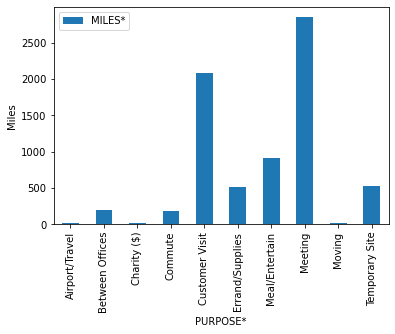

In [28]:
# plotting a graph between purpose and distance

df = pd.DataFrame(uber_df['MILES*'].groupby(uber_df['PURPOSE*']).sum())
df.plot(kind='bar')
plt.ylabel('Miles')
plt.show()

<AxesSubplot:xlabel='MILES*', ylabel='PURPOSE*'>

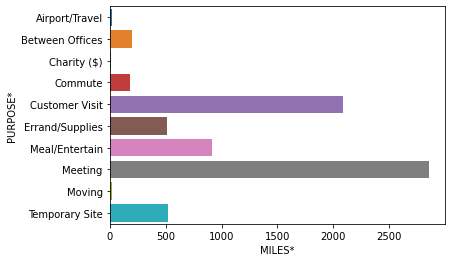

In [30]:
# we can plot using seaborn

df = df.reset_index()
sns.barplot(x=df['MILES*'], y=df['PURPOSE*'])

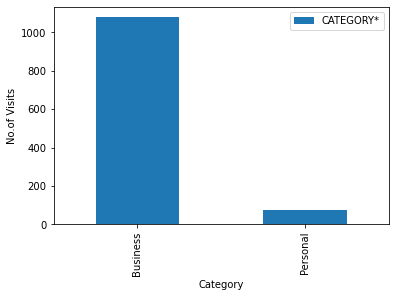

,CATEGORY*
Business,1078
Personal,77


In [39]:
# plot number of trips vs trip category

uber_df.head()

df = pd.DataFrame(uber_df['CATEGORY*'].value_counts())
df.reset_index()

df.plot(kind='bar')
plt.xlabel('Category')
plt.ylabel('No.of Visits')
plt.show()
df